In [ ]:
                             Formative Assessment: Unsupervised Learning


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [2]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
iris_df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)


In [4]:
print("First few rows of the Iris dataset:")
print(iris_df.head())

First few rows of the Iris dataset:
   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


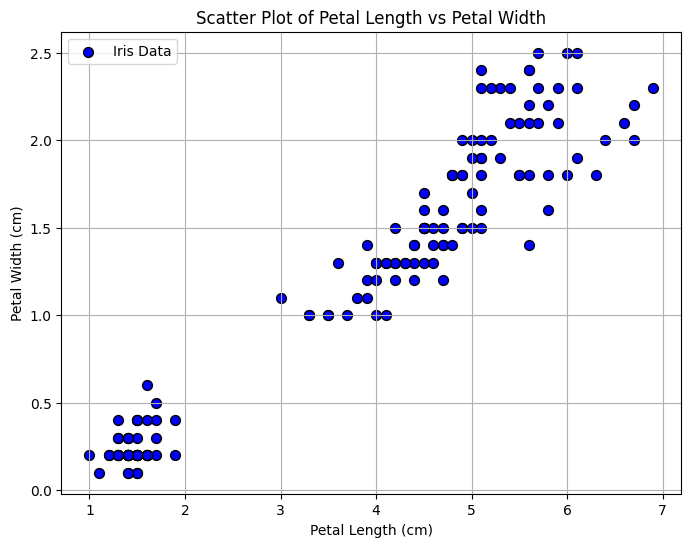

In [5]:
import matplotlib.pyplot as plt

petal_length = iris_df['petal length (cm)']
petal_width = iris_df['petal width (cm)']
plt.figure(figsize=(8, 6))
plt.scatter(petal_length, petal_width, c='blue', marker='o', edgecolor='black', s=50, label='Iris Data')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
                                 2.Clustering Algorithm Implementation

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=42)

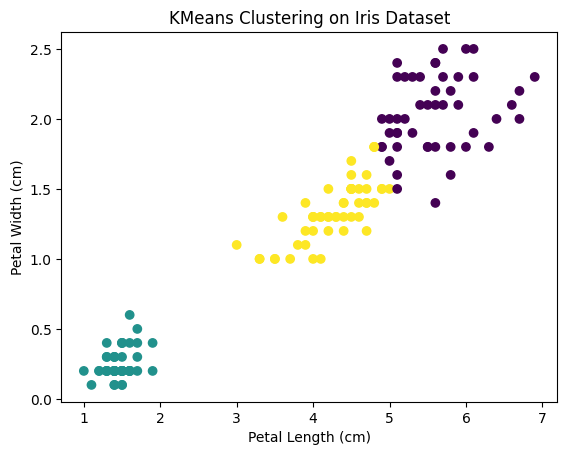

In [9]:
clusters = kmeans.predict(iris_df)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clustering on Iris Dataset')
plt.show()

In [ ]:
KMeans clustering is a popular unsupervised learning algorithm that partitions the dataset into a predefined number of clusters (k).
It works by iteratively assigning each data point to the nearest centroid and then recalculating the centroids based on the mean of
the points assigned to each cluster. 
This process continues until the centroids converge or a specified number of iterations is reached.

Initialization: KMeans starts by randomly initializing k centroids, which are the centers of the clusters.

Assignment Step: Each data point is assigned to the nearest centroid based on a distance metric, commonly Euclidean distance.

Update Step: After all data points have been assigned, the centroids are recalculated as the mean of the points in each cluster.

Iteration: Steps 2 and 3 are repeated until convergence, where the centroids stabilize and no more changes occur in their positions, 
or until a maximum number of iterations is reached.

Why KMeans Clustering might be suitable for the Iris dataset:

Well-separated clusters: The Iris dataset is known to have distinct clusters corresponding to different species of iris flowers 
(setosa, versicolor, and virginica). This characteristic makes it suitable for centroid-based clustering methods like KMeans.

Numeric features: KMeans operates effectively with numeric data, such as the measurements of petal length and width in the Iris dataset.

Simple and efficient: KMeans is computationally efficient and easy to interpret, which is advantageous when analyzing and explaining 
cluster assignments in datasets with clear separation like Iris.

Scalability: KMeans can handle large datasets efficiently, which is beneficial when dealing with the typical size of the Iris dataset.

In summary, KMeans clustering is suitable for the Iris dataset due to its clear separation of clusters based on numeric features and the 
efficiency of the algorithm in handling these characteristics.

In [ ]:
                                 B) Hierarchical Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(iris_df)


AgglomerativeClustering(n_clusters=3)

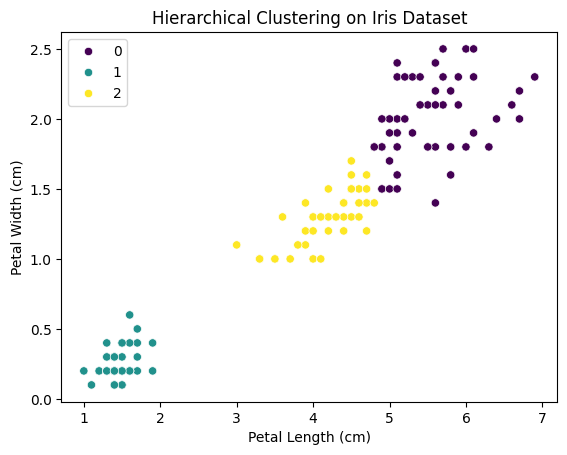

In [11]:
h_clusters = hierarchical.labels_
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=h_clusters, palette='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.show()

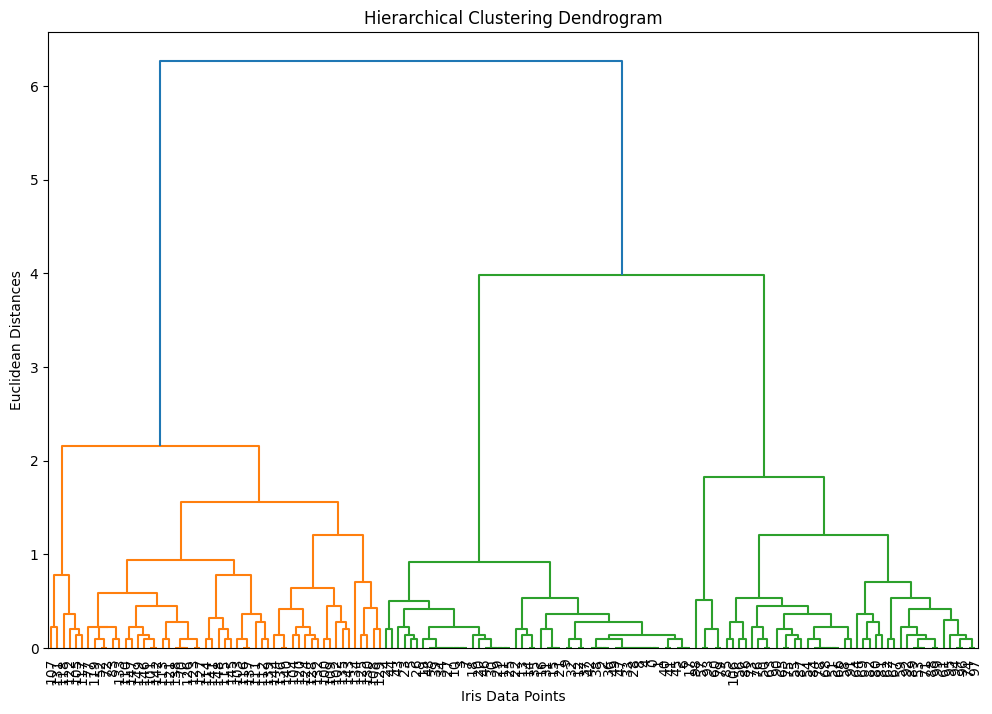

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

hc_complete = linkage(iris_df, method='complete', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(hc_complete, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
Hierarchical clustering is a clustering algorithm that builds a hierarchy of clusters. It does not require a predefined number of clusters like KMeans 
but instead generates a tree of clusters (dendrogram). There are two main approaches to hierarchical clustering:

Agglomerative Clustering: This starts with each data point as its cluster and then iteratively merges the closest pairs of clusters until
only one cluster remains.

Divisive Clustering: This starts with one cluster containing all data points and then recursively splits clusters until each data point 
is in its own cluster.

Agglomerative Clustering is more commonly used:

Initialization: Each data point starts as its cluster.

Merge Step: At each iteration, the two closest clusters are merged into a larger cluster.

Distance Measure: Various distance measures (e.g., Euclidean distance) can be used to determine the proximity of clusters.

Dendrogram: A dendrogram is produced that illustrates the hierarchical relationships between clusters.

Why Hierarchical Clustering might be suitable for the Iris dataset:

Exploring cluster hierarchy: Hierarchical clustering allows us to explore clusters at different levels of granularity, which can be
insightful when dealing with datasets like Iris, where we may want to understand the relationships between different groups of flowers.

No need to specify the number of clusters: Unlike KMeans, which requires specifying k, hierarchical clustering does not need the number 
of clusters to be known in advance, making it suitable for exploration and discovery of natural groupings in the Iris dataset.

Interpretability: The dendrogram provides a visual representation of cluster relationships, aiding in the interpretation of how clusters 
are formed and related.